In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Start with importing dependencies

In [2]:
import means
import sympy
import numpy as np

Let's load P53 model from ``means.examples`` package

In [3]:
import means.examples
model = means.examples.MODEL_P53

In [4]:
model

<class 'means.core.model.Model'>
Species: [y_0, y_1, y_2]
Parameters: [c_0, c_1, c_2, c_3, c_4, c_5, c_6]

Stoichiometry matrix:
Matrix([
[1, -1, -1, 0,  0,  0],
[0,  0,  0, 1, -1,  0],
[0,  0,  0, 0,  1, -1]])

Propensities:
Matrix([
[                    c_0],
[                c_1*y_0],
[c_2*y_0*y_2/(c_6 + y_0)],
[                c_3*y_0],
[                c_4*y_1],
[                c_5*y_2]])

Approximate the model's moments:

In [5]:
ode_problem = means.mea_approximation(model, max_order=2)


In [6]:
ode_problem

<class 'means.core.problems.ODEProblem'>
Method: 'MEA'
Parameters: [c_0, c_1, c_2, c_3, c_4, c_5, c_6]

Equations:

Moment(array([1, 0, 0]), symbol=y_0):
    M_1_0_1*(c_2*y_0/(c_6 + y_0)**2 - c_2/(c_6 + y_0)) + M_2_0_0*(-c_2*y_0*y_2/(c_6 + y_0)**3 + c_2*y_2/(c_6 + y_0)**2) + c_0 - c_1*y_0 - c_2*y_0*y_2/(c_6 + y_0)

Moment(array([0, 1, 0]), symbol=y_1):
    c_3*y_0 - c_4*y_1

Moment(array([0, 0, 1]), symbol=y_2):
    c_4*y_1 - c_5*y_2

Moment(array([0, 0, 2]), symbol=M_0_0_2):
    -2*M_0_0_2*c_5 + 2*M_0_1_1*c_4 + 2*c_4*y_1*y_2 + c_4*y_1 - 2*c_5*y_2**2 + c_5*y_2 - 2*y_2*(c_4*y_1 - c_5*y_2)

Moment(array([0, 1, 1]), symbol=M_0_1_1):
    M_0_1_1*(-c_4 - c_5) + M_0_2_0*c_4 + M_1_0_1*c_3 + c_3*y_0*y_2 + c_4*y_1**2 - c_4*y_1*y_2 - c_4*y_1 - c_5*y_1*y_2 - y_1*(c_4*y_1 - c_5*y_2) - y_2*(c_3*y_0 - c_4*y_1)

Moment(array([0, 2, 0]), symbol=M_0_2_0):
    -2*M_0_2_0*c_4 + 2*M_1_1_0*c_3 + 2*c_3*y_0*y_1 + c_3*y_0 - 2*c_4*y_1**2 + c_4*y_1 - 2*y_1*(c_3*y_0 - c_4*y_1)

Moment(array([1, 0, 1]), symbol=M_

Let's initialise our simulator with the ode_problem we want to simulate

In [7]:
simulator = means.simulation.Simulation(ode_problem)

Define the timepoints we wish to simulate for and the parameters of the simulation we are interested in

In [8]:
timepoints_to_simulate = np.arange(0, 20, 0.5)

In [9]:
# One for each constant
parameters = [[90, 0.002, 1.2, 1.1, 0.8, 0.96, 0.01], 
              [80, 0.002, 1.2, 1.1, 0.8, 0.96, 0.01],
              [70, 0.002, 1.2, 1.1, 0.8, 0.96, 0.01]] 
# One for each species
initial_conditions = [[80, 40, 60], [80, 40, 60], [80, 40, 60]]

In [10]:
simulation_results = []
for current_parameters, current_initial_conditions in zip(parameters, initial_conditions):
    trajectories = simulator.simulate_system(current_parameters, current_initial_conditions, timepoints_to_simulate)
    simulation_results.append(trajectories)

Could not find GLIMDA


Let's now plot the simulated trajectories

In [11]:
import matplotlib.pyplot as plt

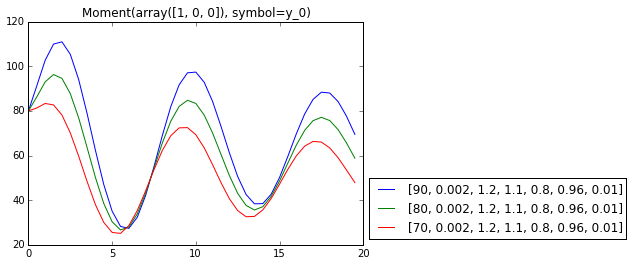

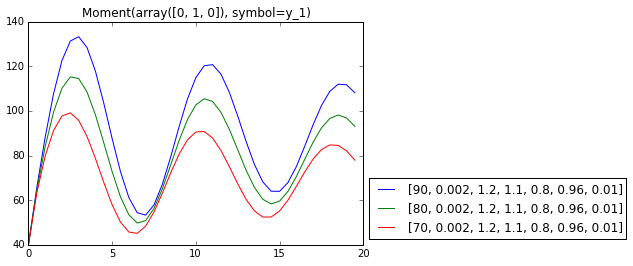

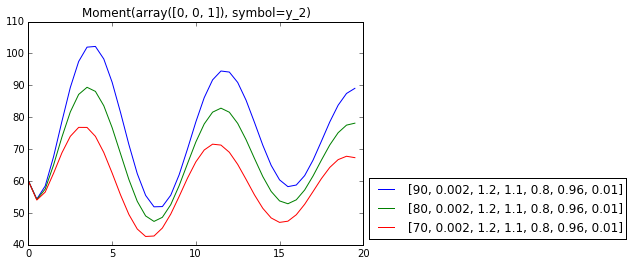

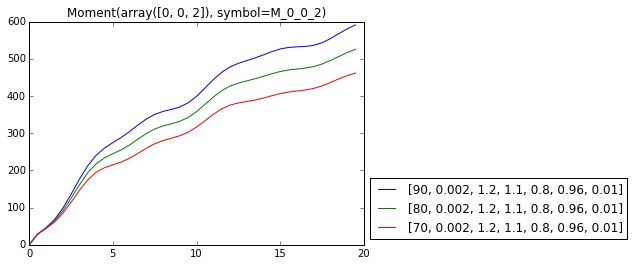

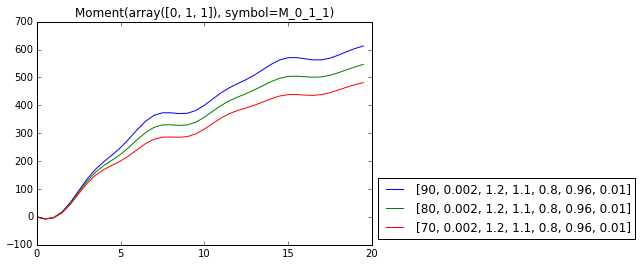

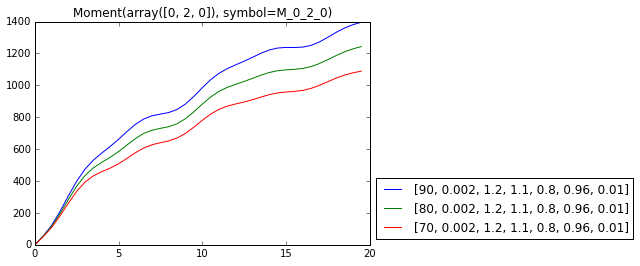

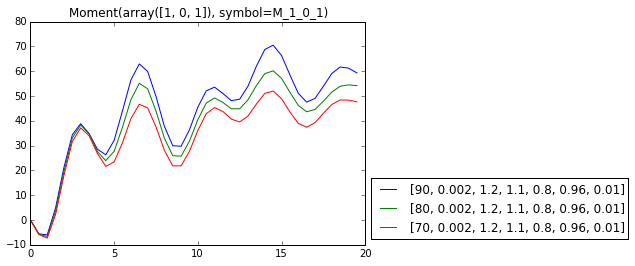

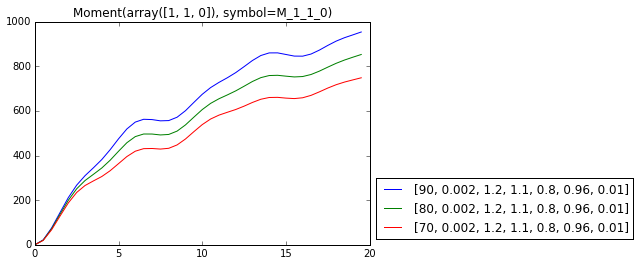

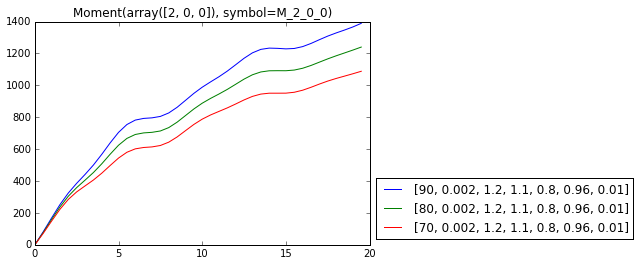

In [12]:
# Compare parameters  for each of the moments
for parameter_set, simulation_result in zip(parameters, simulation_results):
    for i, trajectory in enumerate(simulation_result):
        plt.figure(i)
        #plt.plot(trajectory.timepoints, trajectory.values, label= str(parameter_set))
        trajectory.plot(label = parameter_set)
        plt.title(trajectory.description)
        plt.legend(loc='lower left', bbox_to_anchor = (1, 0))
    

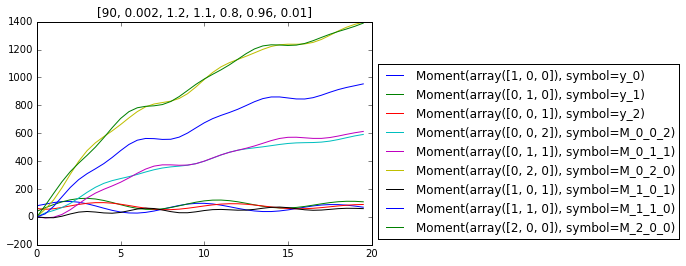

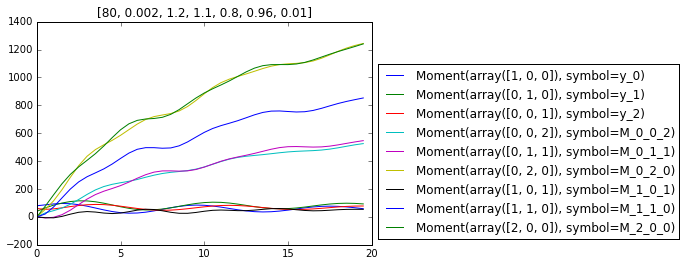

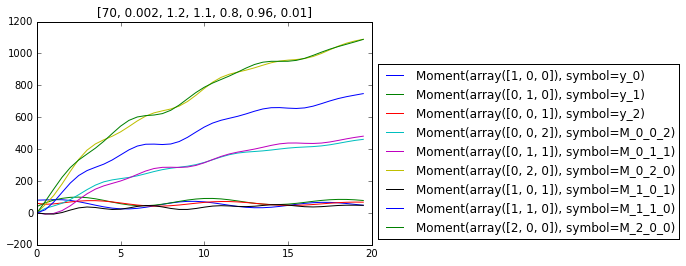

In [13]:
# Compare moments for each of the parameters
for parameter_set, simulation_result in zip(parameters, simulation_results):
    plt.figure()
    for trajectory in simulation_result:
        trajectory.plot(label = trajectory.description)
    plt.title(repr(parameter_set))
    plt.legend(loc='lower left', bbox_to_anchor = (1, 0))
    